## Generate and plot a test dataset

In [3]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [4]:
np.random.seed(0)

In [5]:
# Generate a dataset with mean 0 and std dev 1
X,y = datasets.make_classification(n_samples=100,n_informative=2,n_redundant=0, n_features=2)
X,y

(array([[-7.66054695e-01,  1.83324682e-01],
        [-9.20383253e-01, -7.23168038e-02],
        [-9.86585088e-01, -2.86920000e-01],
        [ 1.70910242e+00, -1.10453952e+00],
        [ 1.98764670e+00,  1.77624479e+00],
        [ 3.86274219e+00,  2.63325914e+00],
        [-1.12836011e+00, -4.22761581e-01],
        [-1.10074198e+00, -2.56042975e+00],
        [-1.53716448e+00,  1.10502647e+00],
        [-3.23726922e-01,  5.56269743e-01],
        [-1.28532883e+00, -1.30819171e+00],
        [ 3.35973253e+00, -1.79506345e+00],
        [-1.27034986e+00,  1.26780440e+00],
        [-7.10233633e-01, -1.13058206e+00],
        [-1.12933108e+00,  6.87661760e-01],
        [ 2.48206729e-01, -5.09792713e-01],
        [-2.47263494e+00, -4.86612462e-01],
        [-1.11573423e+00,  1.43370121e+00],
        [-1.21414740e+00,  1.97698901e+00],
        [-1.25860859e+00, -1.82896522e-01],
        [-5.35834091e-01,  1.10698637e+00],
        [ 9.23281451e-01, -1.30813451e+00],
        [ 2.02751248e+00, -4.032

In [6]:
# Manipiulating the first feature of this artifical dataset to be default length in mm so we halve
# the std dev an shift it to be centred around 5
X[:,0] = np.abs(X[:,0]*0.5 +5)
# Manipulating the second feature to be brightness (out of 256 colours) so we scale std dev by 30 and make the mean 160
X[:,1] = np.abs(X[:,1]*30 + 160)

(44.076920069325084, 243.9977740599514)

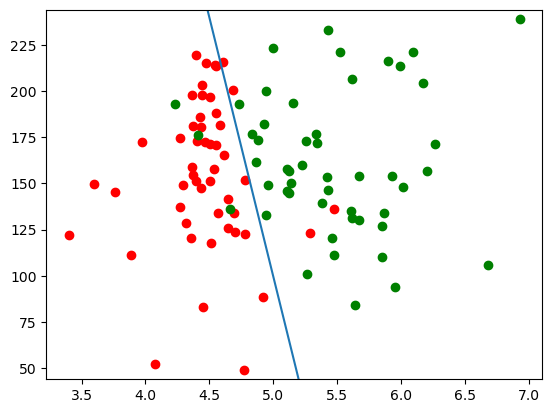

In [7]:
fig, ax = plt.subplots()
ax.scatter(X[y==0,0], X[y==0,1],c= 'red')
ax.scatter(X[y==1,0], X[y==1,1], c='green')
x1 = np.linspace(min(X[:,0]), max(X[:,0]), X.shape[0])
x2 = -280*x1 + 1500
ax.plot(x1,x2)
ax.set_ylim(min(X[:,1])-5, max(X[:,1])+5)

## Make a function to generate a suitable covariance matrix

In [8]:
def get_cov(sdx: float = 1, sdy: float =1, rotangdeg: int = 0):
    '''
    Returns a covariance matrix given two standard deviations and a rotation

    Parameters:
        sdx (float): standard deviation of the first parameter
        sdy (float): standrard deviation of the second parameter
    Returns:
        covar (Array[2,2]): 2 x 2 covariance matrix
    '''
    covar = np.array([[sdx**2,0], [0, sdy**2]])
    rot_ang = rotangdeg/360 * 2 * np.pi #convert to radians
    c, s = np.cos(rot_ang), np.sin(rot_ang)
    rot_mat = np.array(((c, -s), (s, c)))

    covar = np.matmul(np.matmul(rot_mat, covar), rot_mat.T)
    return covar

In [17]:
def gen_sample_grid (npx=200, npy=200, limit =1):
    '''
    Returns a sample grid of every possible combination of the two inputs 
    '''
    x1line = np.linspace (-1,1,npx)
    x2line = np.linspace (-1,1,npy)
    x1grid, x2grid = np.meshgrid(x1line,x2line)
    print (f'x1 grid shape: {x1grid.shape}\nx2 grid shape: {x2grid.shape}')
    Xgrid = np.array([x1grid, x2grid]).reshape([2,40000]).T
    return Xgrid, x1line, x2line

In [30]:
cov = get_cov(1,0.3,30)
# We use a sample grid to map out every possible input in the problem space
grid = gen_sample_grid()
Xgrid = grid[0]

x1 grid shape: (200, 200)
x2 grid shape: (200, 200)


In [31]:
p = 1 / (2* np.pi * np.sqrt(np.linalg.det(cov))) * np.exp(
-0.5*(np.matmul(Xgrid,np.linalg.inv(cov))*Xgrid).sum(-1))
p_grid = np.reshape(p, (200,200))

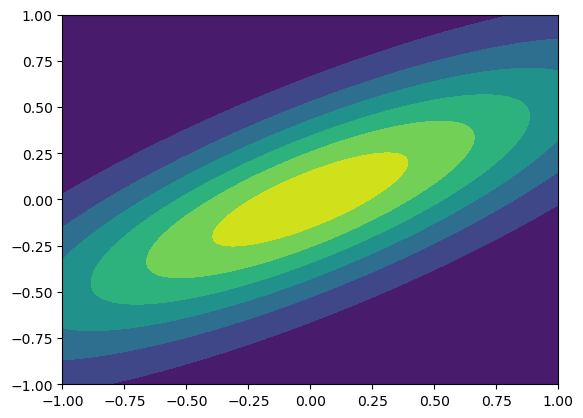

In [32]:
plt.contourf(grid[1],grid[2],p_grid)

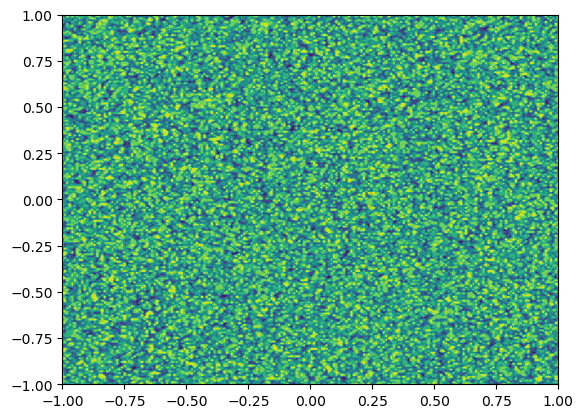

In [36]:
n = 200
real_Xgrid = np.random.multivariate_normal(mean = np.zeros(2), cov = cov, size = n**2)
real_p = 1 / (2* np.pi * np.sqrt(np.linalg.det(cov))) * np.exp(
-0.5*(np.matmul(real_Xgrid,np.linalg.inv(cov))*real_Xgrid).sum(-1))
real_p_grid = np.reshape(real_p, (n,n))
plt.contourf(np.linspace(-1,1,n),np.linspace(-1,1,n),real_p_grid)

## Generating a circular distribution